1/ Display general information about the dataset

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('bank (1).csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.shape

(11162, 17)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'outcome', 'deposit'],
      dtype='object')

In [8]:
object_columns = df.columns[df.dtypes == 'object']
object_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
unique_names = df['job'].unique()
print(unique_names)

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


In [10]:
unique_names = df['marital'].unique()
print(unique_names)

['married' 'single' 'divorced']


In [11]:
unique_names = df['education'].unique()
print(unique_names)

['secondary' 'tertiary' 'primary' 'unknown']


In [12]:
unique_names = df['default'].unique()
print(unique_names)

['no' 'yes']


In [16]:
unique_names = df['housing'].unique()
print(unique_names)

['yes' 'no']


In [17]:
unique_names = df['loan'].unique()
print(unique_names)

['no' 'yes']


In [18]:
unique_names = df['contact'].unique()
print(unique_names)

['unknown' 'cellular' 'telephone']


In [19]:
unique_names = df['poutcome'].unique()
print(unique_names)

['unknown' 'other' 'failure' 'success']


In [21]:
df = df.rename(columns={'poutcome': 'outcome'})

In [22]:
df['outcome'].value_counts()

,count
outcome,
unknown,8326
failure,1228
success,1071
other,537


In [20]:
unique_names = df['deposit'].unique()
print(unique_names)

['yes' 'no']


In [24]:
unique_names = df['balance'].unique()
print(unique_names)

[2343   45 1270 ... 1594 2593 -134]


In [27]:
unique_names = df['campaign'].unique()
print(unique_names)

[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]


In [28]:
unique_names = df['pdays'].unique()
print(unique_names)

[ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90
 196 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112
  41 294 231 239 302 135 307 222 138 323 141 320 264 316 315 256 146 328
  74 148 327 341 145 266 234 345 318 325 274 343 260 305 344 254 180 340
  82 181 278 153   4 349 334 176  87 269  86 169  83  79   6 259  13 161
 350  84  80 164  22 296  66 263 333  17  89  78 286 337 364 188 342 363
 352 295 353 356 288 367 366 359 347 370 284 300 306 361 287 301 355 371
 292 360 358 346 357 368 312 179 329 298 372 374 375 291  95 109  94  98
 186 101 187 321  40  96  21  35  97 285 103 212 293  81  38  28  67  60
 120  55 113  71 119  72  20 391  50 207 105 314 211 140 104  65 395 399
  49 389 386 412  62 229 385 156  63  64  69 394  70 185 102 190 461 116
 422 457 430 192 462 403 191 459 397 197 173 271 428 392 193 474 475 477
 130 283 157 476 131 132 129 134 114 121 107 115  5

In [29]:
unique_names = df['previous'].unique()
print(unique_names)

[ 0  1  4  2  3 10  7  9  5 29  6 13 17  8 11 30 22 58 21 14 26 12 19 55
 23 15 20 27 16 41 40 28 18 37]


In [30]:
columns_to_drop = ['contact', 'outcome', 'day', 'month']
df=df.drop(columns=columns_to_drop)

In [31]:
cat_cols = [col for col in df.columns if df[col].dtype =='object']
num_cols = [col for col in df.columns if df[col].dtype !='object']

In [32]:
num_cols

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

Data Visualizations

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'pdays', 'previous', 'deposit'],
      dtype='object')

In [33]:
cat_cols

['job', 'marital', 'education', 'default', 'housing', 'loan', 'deposit']

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
df['job_e'] = le.fit_transform(df['job'])

In [39]:
df['marital_e'] = le.fit_transform(df['marital'].astype(str))

In [40]:
df['education_e'] = le.fit_transform(df['education'].astype(str))

In [41]:
df['default_e'] = le.fit_transform(df['default'])

In [42]:
df['loan_e'] = le.fit_transform(df['loan'])

In [43]:
df['deposit_e'] = le.fit_transform(df['deposit'])

In [44]:
df['housing_e'] = le.fit_transform(df['housing'])

In [45]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
duration,int64
campaign,int64


In [46]:
df = df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'deposit'])

In [47]:
df.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'job_e',
       'marital_e', 'education_e', 'default_e', 'loan_e', 'deposit_e',
       'housing_e'],
      dtype='object')

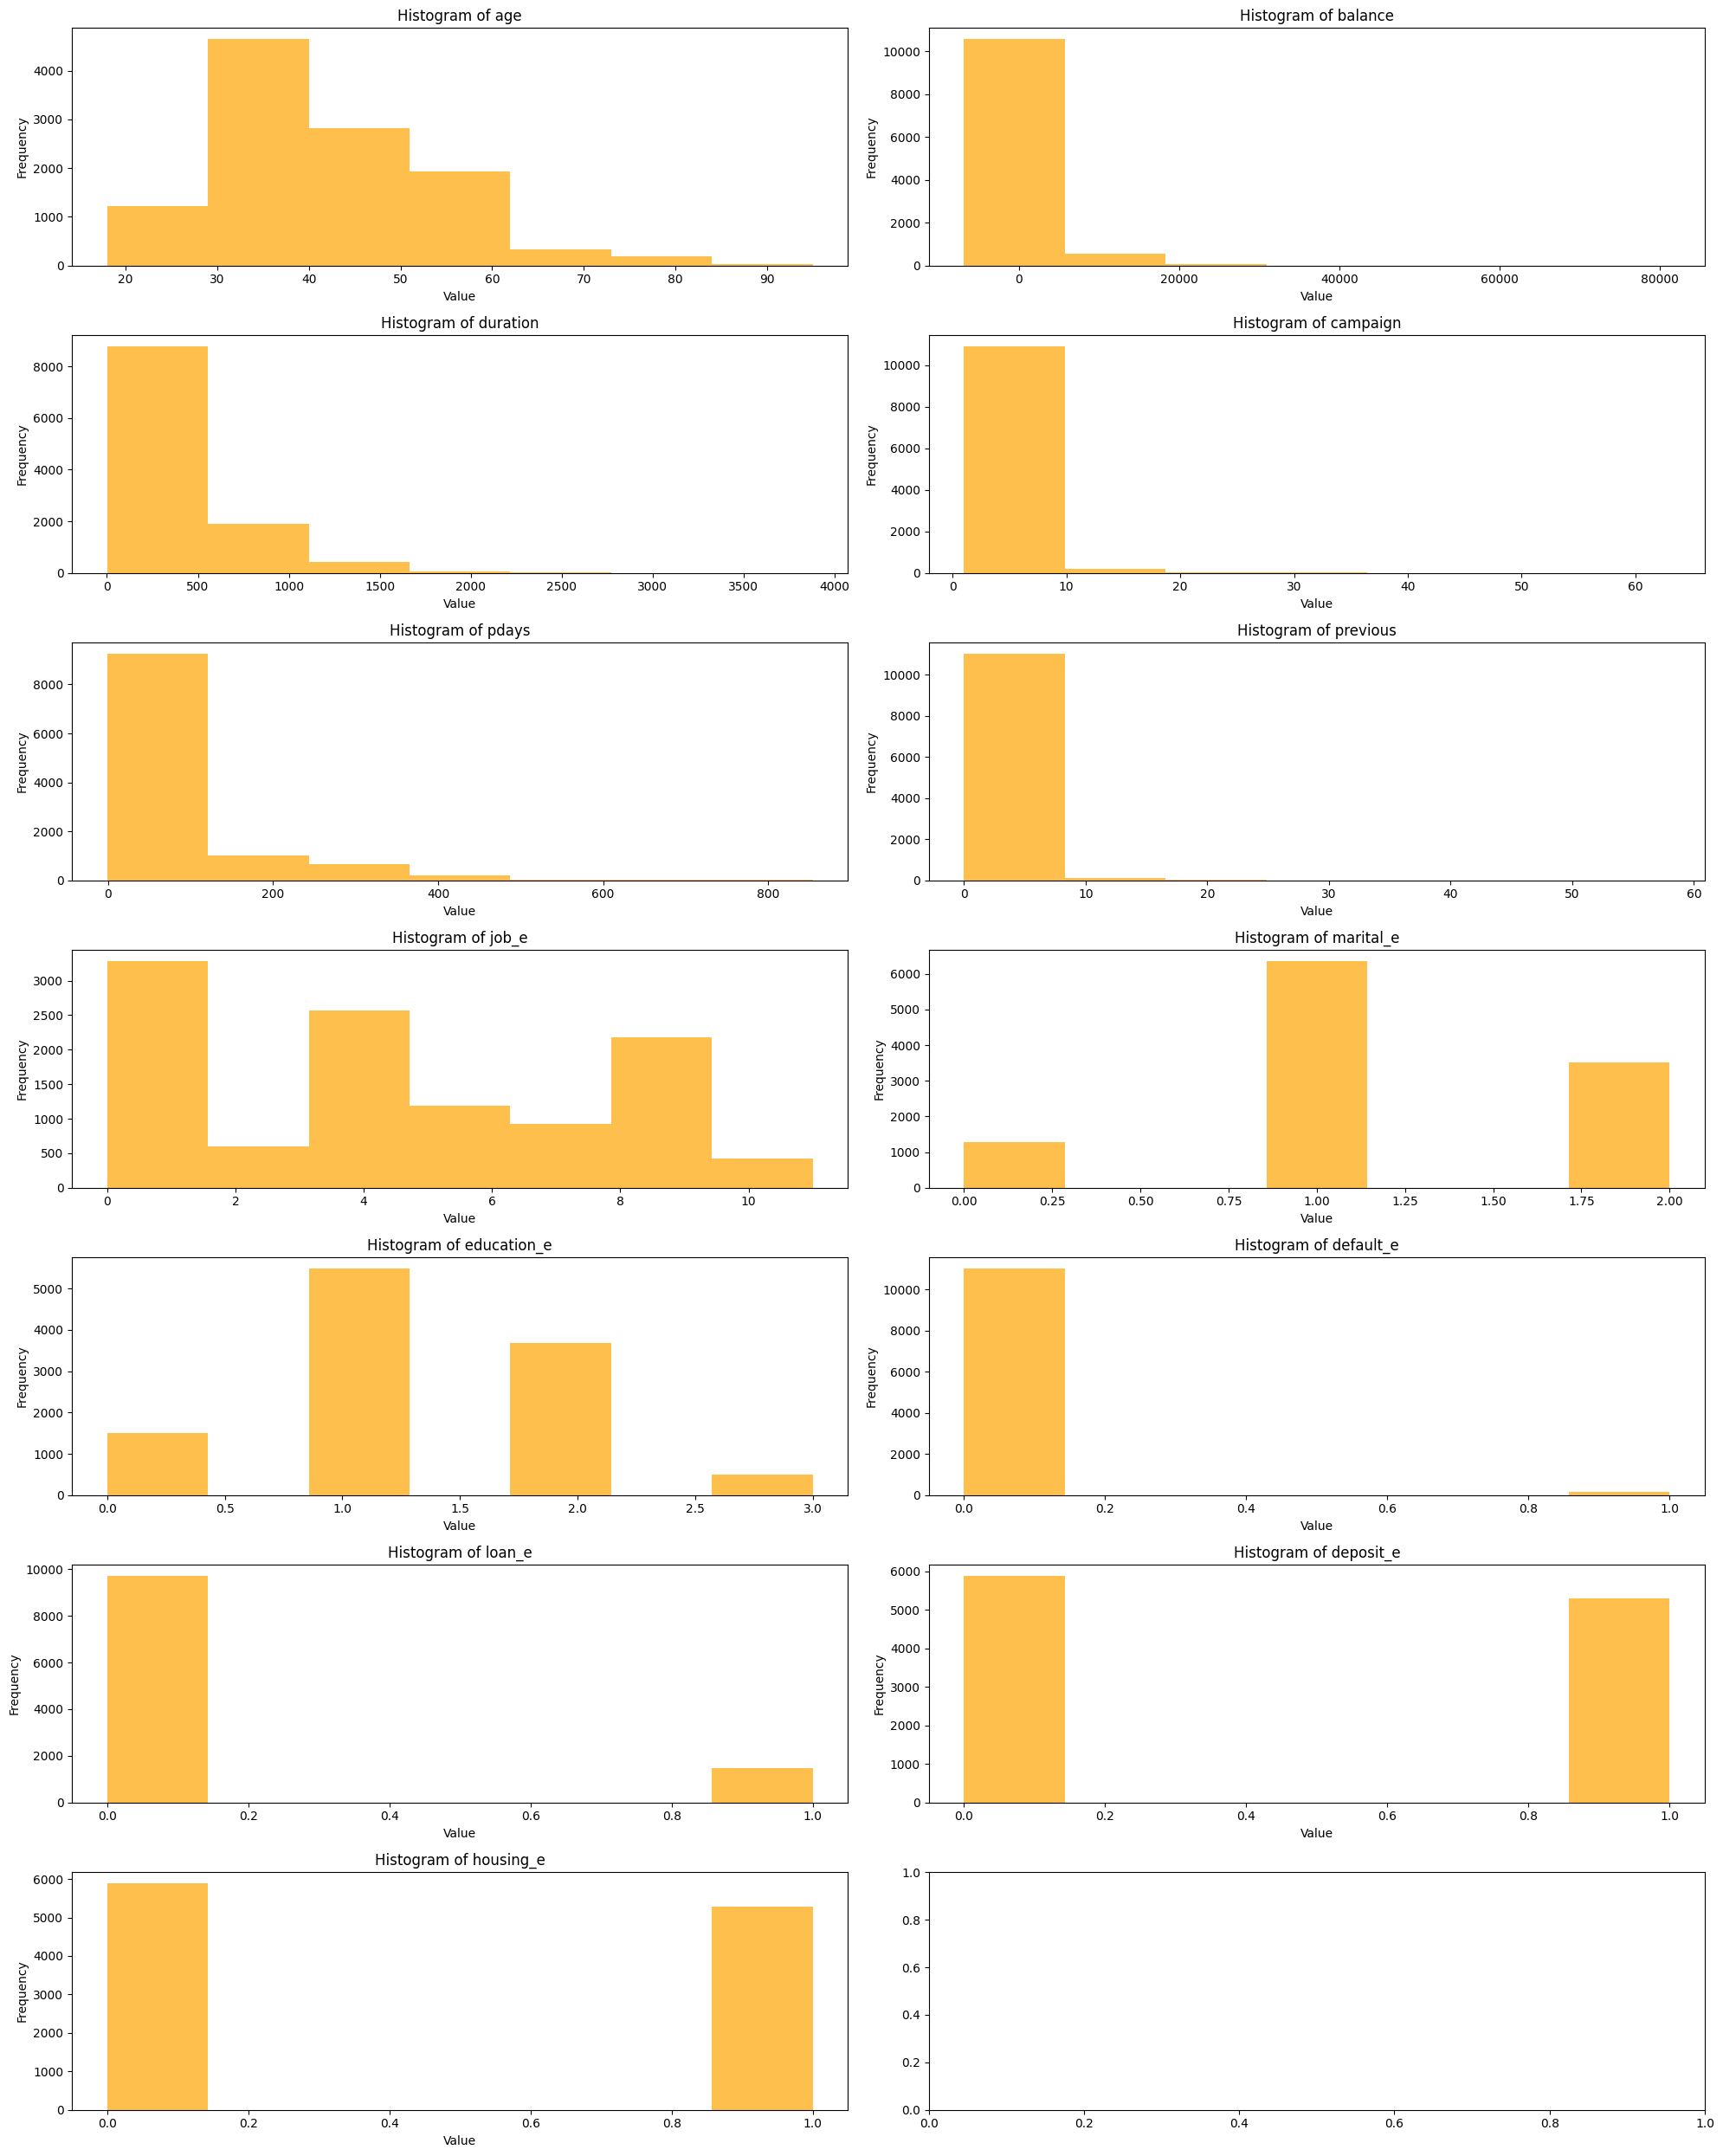

In [48]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(7, 2, figsize=(20, 25))

# List of columns to plot
columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'job_e',
       'marital_e', 'education_e', 'default_e', 'loan_e', 'deposit_e',
       'housing_e']


# Loop through columns and plot histograms
for i, col in enumerate(columns):
    # Determine row and column index for each plot
    row = i // 2
    col_idx = i % 2

    # Plot histogram for the column
    axes[row, col_idx].hist(df[col], bins=7, color='orange', alpha=0.7)
    axes[row, col_idx].set_title(f'Histogram of {col}')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [49]:
num_cols

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [50]:
cat_cols

['job', 'marital', 'education', 'default', 'housing', 'loan', 'deposit']

In [51]:
df.dtypes

,0
age,int64
balance,int64
duration,int64
campaign,int64
pdays,int64
previous,int64
job_e,int64
marital_e,int64
education_e,int64
default_e,int64


In [52]:
df.head()

,age,balance,duration,campaign,pdays,previous,job_e,marital_e,education_e,default_e,loan_e,deposit_e,housing_e
0,59,2343,1042,1,-1,0,0,1,1,0,0,1,1
1,56,45,1467,1,-1,0,0,1,1,0,0,1,0
2,41,1270,1389,1,-1,0,9,1,1,0,0,1,1
3,55,2476,579,1,-1,0,7,1,1,0,0,1,1
4,54,184,673,2,-1,0,0,1,2,0,0,1,0


In [53]:
all_duplicates = df[df.duplicated(keep=False)]

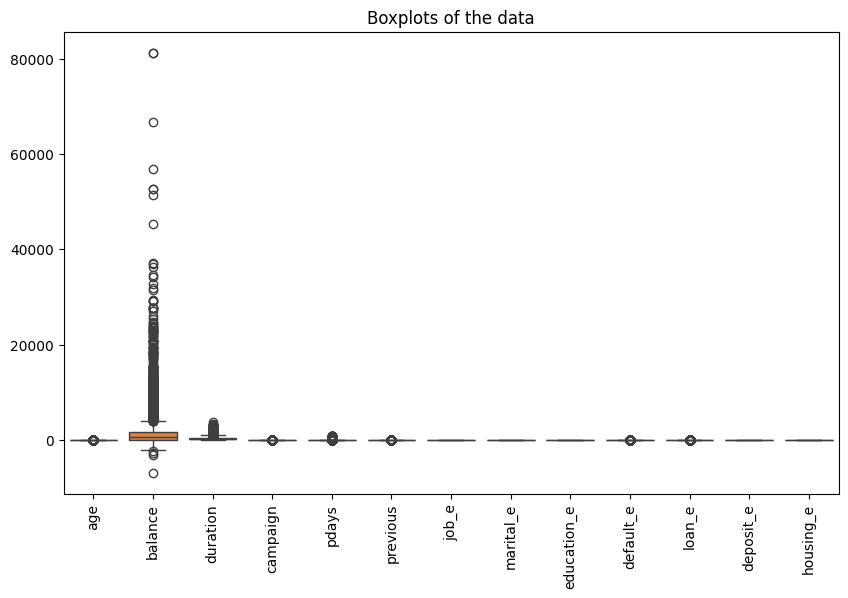

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplots of the data')
plt.show()

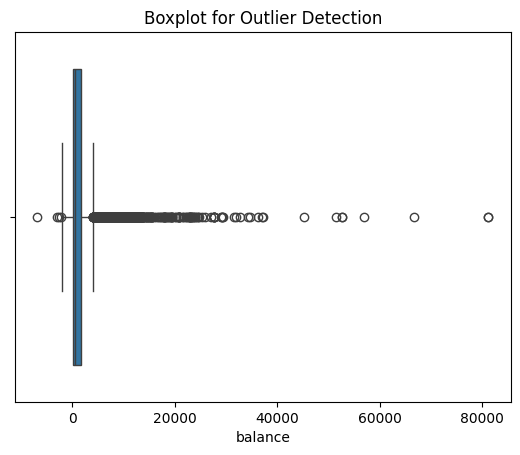

In [55]:
sns.boxplot(x=df['balance'])
plt.title('Boxplot for Outlier Detection')
plt.show()

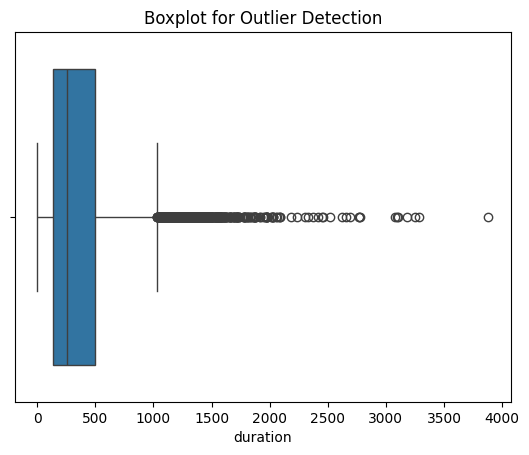

In [56]:
sns.boxplot(x=df['duration'])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [57]:
from scipy.stats import zscore
z_score = np.abs(zscore(df))
df['z_score_duration'] = zscore(df['duration'])
df['z_score_balance'] = zscore(df['balance'])
df1 = df[df['z_score_duration'].abs() <= 3].drop(columns='z_score_duration')
df1 = df[df['z_score_balance'].abs() <= 3].drop(columns='z_score_balance')

In [58]:
from sklearn.preprocessing import StandardScaler

exclude_cols = ['job_e', 'marital_e', 'education_e', 'default_e', 'housing_e', 'loan_e', 'deposit_e']

numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
cols_to_scale = [col for col in numeric_cols if col not in exclude_cols]

scaler = StandardScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [60]:
X = df.drop(columns=['deposit_e'])
y = df['deposit_e']

In [61]:
X

,age,balance,duration,campaign,pdays,previous,job_e,marital_e,education_e,default_e,loan_e,housing_e,z_score_duration,z_score_balance
0,59,2343,1042,1,-1,0,0,1,1,0,0,1,1.930226,0.252525
1,56,45,1467,1,-1,0,0,1,1,0,0,0,3.154612,-0.459974
2,41,1270,1389,1,-1,0,9,1,1,0,0,1,2.929901,-0.080160
3,55,2476,579,1,-1,0,7,1,1,0,0,1,0.596366,0.293762
4,54,184,673,2,-1,0,0,1,2,0,0,0,0.867171,-0.416876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,-1,0,1,2,0,0,0,1,-0.331287,-0.473616
11158,39,733,83,4,-1,0,7,1,1,0,0,0,-0.832564,-0.246658
11159,32,29,156,2,-1,0,9,2,1,0,0,0,-0.622258,-0.464934
11160,43,0,9,2,172,5,9,1,1,0,1,0,-1.045752,-0.473926


In [62]:
y

,deposit_e
0,1
1,1
2,1
3,1
4,1
...,...
11157,0
11158,0
11159,0
11160,0


In [63]:
df.shape

(11162, 15)

In order to gain time, I have used a sample which is more than the half of the data as it is mentioned below.

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification here yes or no
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2,
          callbacks=[TensorBoard(log_dir='./logs')])

Epoch 1/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7791 - loss: 0.4812 - val_accuracy: 0.7889 - val_loss: 0.4554
Epoch 2/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7818 - loss: 0.4699 - val_accuracy: 0.7749 - val_loss: 0.4769
Epoch 3/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7760 - loss: 0.4784 - val_accuracy: 0.7777 - val_loss: 0.4710
Epoch 4/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7734 - loss: 0.4763 - val_accuracy: 0.7760 - val_loss: 0.4771
Epoch 5/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7802 - loss: 0.4842 - val_accuracy: 0.7928 - val_loss: 0.4551
Epoch 6/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7717 - loss: 0.4821 - val_accuracy: 0.7850 - val_loss: 0.4600
Epoch 7/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7831 - loss: 0.4726 - val_accuracy: 0.7861 - val_loss: 0.4608
Epoch 8/40
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7803 - loss: 0.4694 - val_accuracy: 0.

As we have seen, the accuracy of this model is 0,7907.

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7801164352888491
Precision: 0.7372322899505767
Recall: 0.8388003748828491
F1 Score: 0.7847435335379219


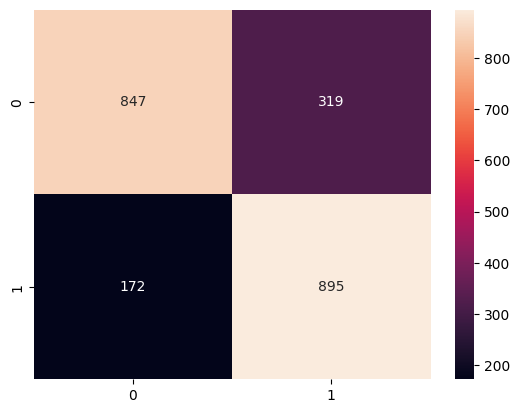

In [71]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  #

# Calculate evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred_classes))
print('Precision:', precision_score(y_test, y_pred_classes))
print('Recall:', recall_score(y_test, y_pred_classes))
print('F1 Score:', f1_score(y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In order to better interpret the results of the use of this model, we can say that an accuracy percentage of 78.01% reflects that 78% of the decisions of deposit were correct, according to this deep learning model.

 marketing campaign outcome ("deposit" either Yes or No)
Moreover, a precision of 73.72% shows that the model predicts a positive marketing compaign outcome correct 73.7% of the time.

And finally, the model identifies 83.9% of the actual positive outcomes.